In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
data = pd.read_csv("day.csv") # Mention the path of the dataset, in my case i have my dataset in same directory
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
data.shape

(730, 16)

In [4]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
data.info() #From the output below it is clear that therre arent any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.isna().sum() # The output below confirms that there are no null values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# First of all we will try and fix some columns and then maybe we can decided which columns to drop based on our observations
# We will round of some columns which consists of float data to 2 decimals just to clean the data a little

In [8]:
cols_to_roundoff = data.columns[data.dtypes == float].values
cols_to_roundoff
    

array(['temp', 'atemp', 'hum', 'windspeed'], dtype=object)

In [9]:
data[cols_to_roundoff] = round(data[cols_to_roundoff],2)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


### Now let's convert some numerics to categorical variable for ease of understanding
- For the column season we have the following replacements:
    - season (1:spring, 2:summer, 3:fall, 4:winter)

In [10]:
data.season = data.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [11]:
rand_data = data[["dteday"]]
rand_data

,dteday
0,01-01-2018
1,02-01-2018
2,03-01-2018
3,04-01-2018
4,05-01-2018
...,...
725,27-12-2019
726,28-12-2019
727,29-12-2019
728,30-12-2019


In [12]:
pd.to_datetime(rand_data["dteday"], dayfirst = True).dt.dayofweek


0      0
1      1
2      2
3      3
4      4
      ..
725    4
726    5
727    6
728    0
729    1
Name: dteday, Length: 730, dtype: int64

In [13]:
data["mnth"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [14]:
data["mnth"] = data["mnth"].map({1 : "January", 2 : "February", 3 : "March", 4 : "April", 5 : "May", 6 : "June", 7: "July",
                 8 : "August", 9 : "September", 10 : "October", 11 : "November", 12 : "December"})

In [15]:
data["weathersit"].unique()

array([2, 1, 3])

In [16]:
data["weathersit"] = data["weathersit"].map({1 : "Ideal", 2 : "Moderate", 3 : "Bad", 4 : "Severe"})
data["weathersit"].unique()

array(['Moderate', 'Ideal', 'Bad'], dtype=object)

### Since we fixed and performed operations deemed appropriate, now we will focus on selecting the features we need and dropping those which are redundant or of no use

In [17]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,January,0,6,0,Moderate,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,spring,0,January,0,0,0,Moderate,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,spring,0,January,0,1,1,Ideal,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,spring,0,January,0,2,1,Ideal,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,spring,0,January,0,3,1,Ideal,9.31,11.46,43.70,12.52,82,1518,1600


### After observing the columns and their values we have decided to exclude the follwing columns from our model

- instant : This is just the record number and clearly is of no use
- dteday : Most of the information from this column have been derived in other columns, so this holds little to no value and would be redundant
- casual & registered : We will assume we dont know these values while the model predicts on new data and our target value is simply the sum of these two columns so when we include these in our model, the model will memorize these value and fail to generalize on the given data, in simple term these two values will leak information of our targeted variable



In [18]:
cols_to_drop = ["instant", "dteday", "casual", "registered"]
print("Shape of data before dropping the columns", data.shape)
data.drop(cols_to_drop, axis = 1,inplace = True)
print("Shape of data after dropping the columns", data.shape)

Shape of data before dropping the columns (730, 16)
Shape of data after dropping the columns (730, 12)


In [19]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,6,0,Moderate,14.11,18.18,80.58,10.75,985
1,spring,0,January,0,0,0,Moderate,14.90,17.69,69.61,16.65,801
2,spring,0,January,0,1,1,Ideal,8.05,9.47,43.73,16.64,1349
3,spring,0,January,0,2,1,Ideal,8.20,10.61,59.04,10.74,1562
4,spring,0,January,0,3,1,Ideal,9.31,11.46,43.70,12.52,1600


In [20]:
print(f"The mean of 'temp' is {np.mean(data['temp'])} and that of 'atemp' is {np.mean(data['atemp'])}" )

The mean of 'temp' is 20.319328767123267 and that of 'atemp' is 23.7263835616438


#### We can observe that "temp" and "atemp" have similar values
- Their means are quite close 
- We will keep them for now and analyse them during our visualization

## Data Visualisation
 - Checking outliers
 - identifying some collinearity
 - How the variables interact with the target variable

## 1) Checking outliers
### Since we have only 4 columns to check for outliers we can do so in a single cell
- We will plot a boxplot for the following columns
    - [temp, atemp, hum, windspeed]

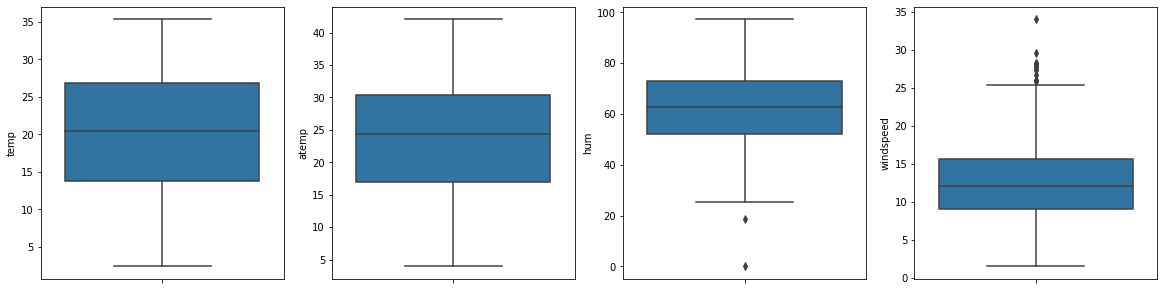

In [21]:
boxplot_cols = ["temp", "atemp", "hum", "windspeed"]


for i,j in enumerate(boxplot_cols):
    plt.subplot(1,4,i+1)
    sns.boxplot(data = data, y = j)
    plt.gcf().set_size_inches(20,5)

## Observations;
- We dont seem to have annoying outliers although we seem to have some in windspeed but we cannot do anything about cause the windspeed will depend upon the nature of the weather
- We will see if this at all affects our model during our model building

## 2) Identifying some collinearity

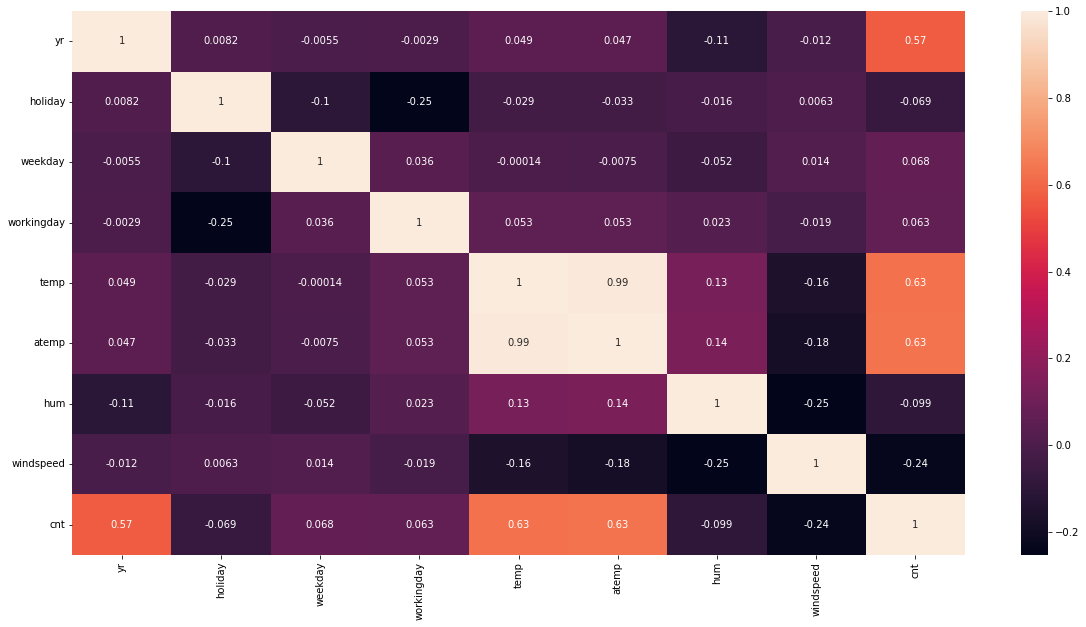

In [22]:
sns.heatmap(data = data.corr(), annot = True)
plt.gcf().set_size_inches(20,10)

## Observations :
- We can see that temp and atemp have atemp have the highest correlation almost equal to 1, so we can drop atemp since this column indicates the how the temp feels like compared to actual temp, this could be different with different people
- Also the column yr seems to be moderately(positive) correlated with our targeted variable

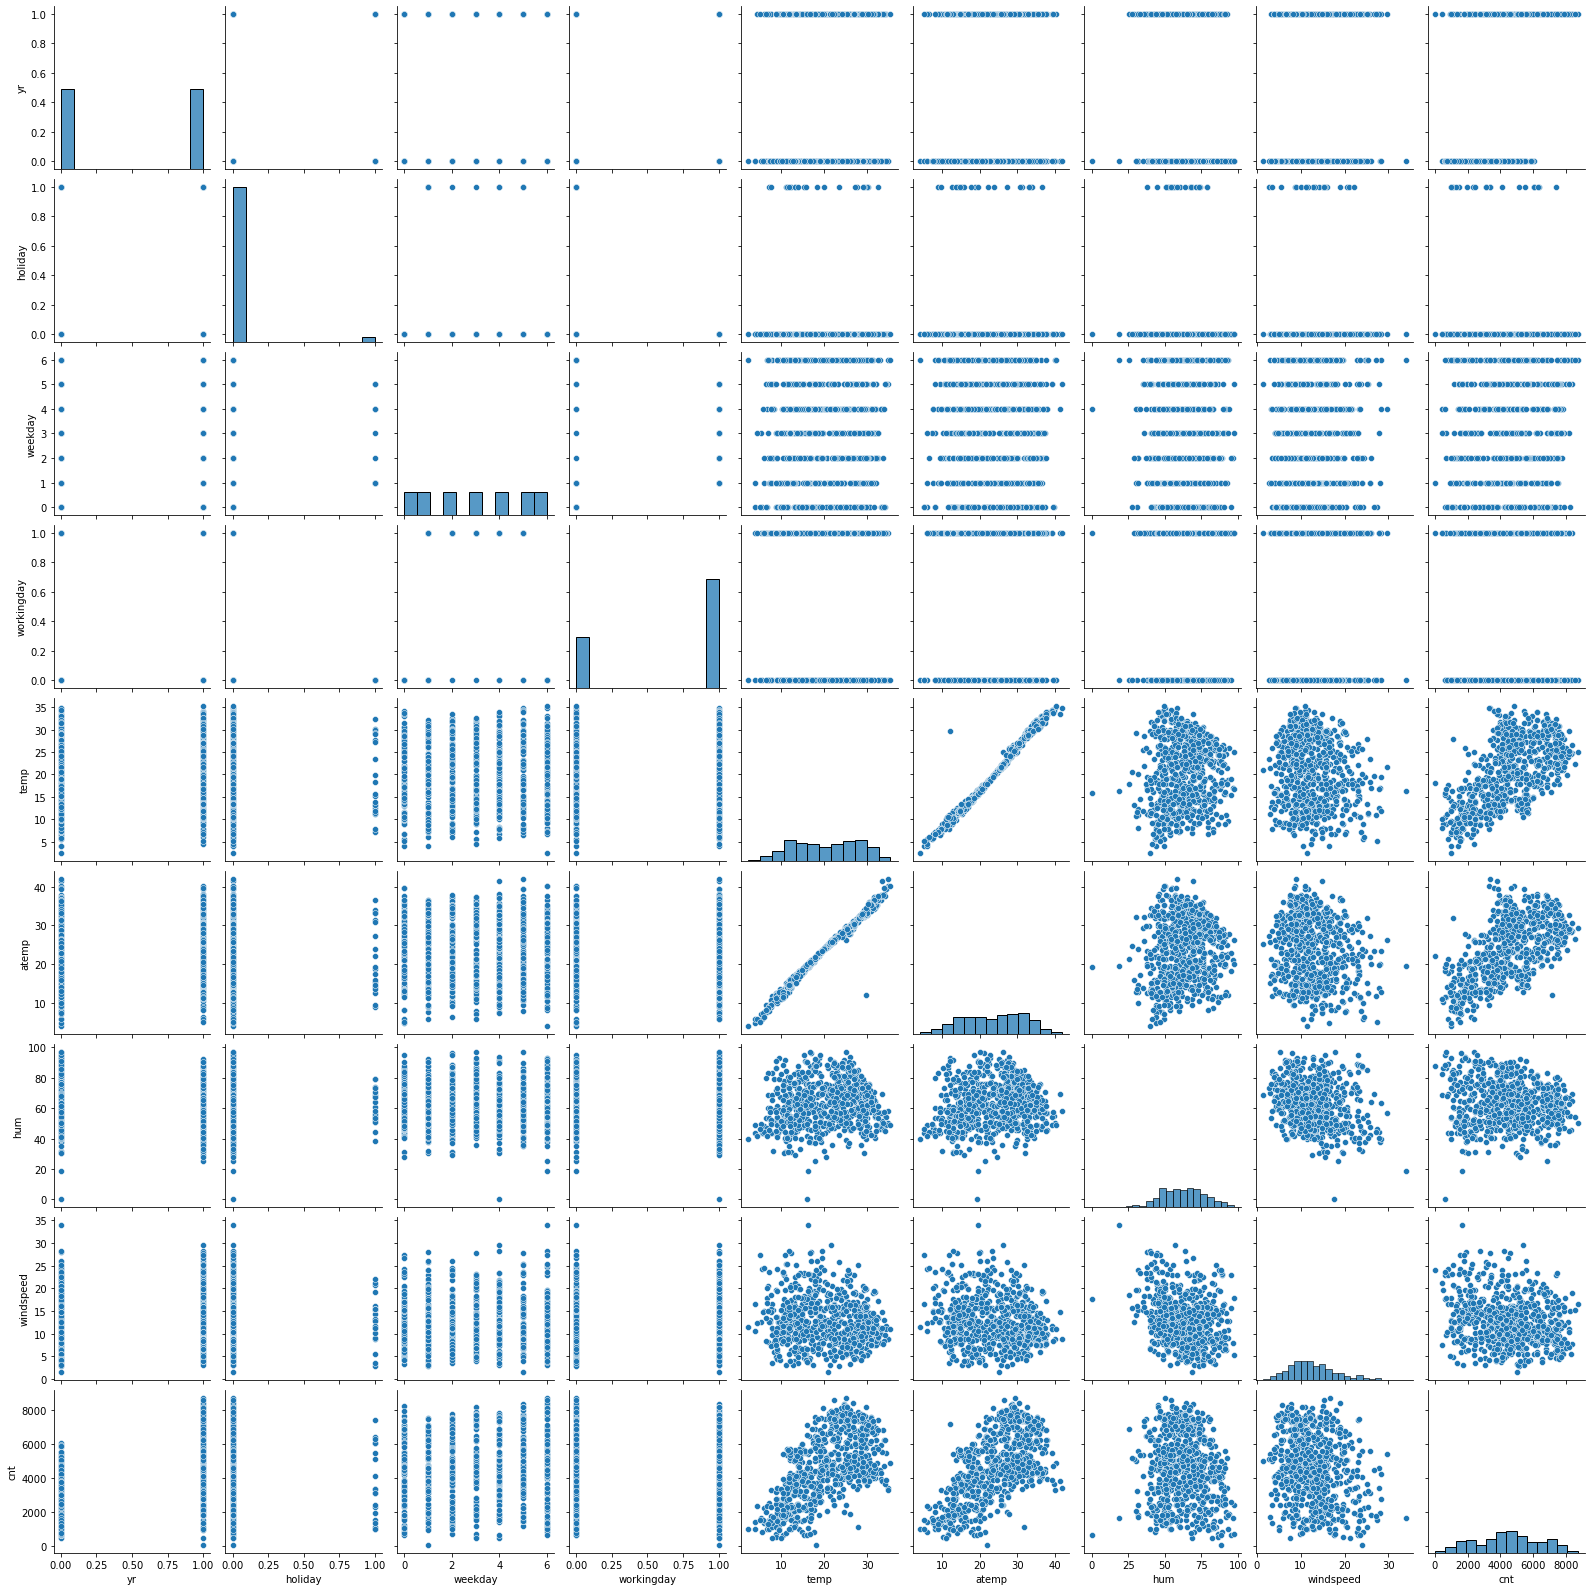

In [23]:
sns.pairplot(data = data)


## Observations : 
- We find some collinearity with temp vs cnt
- We can conclude that there exist some collinearity 

## How the variables interact with the target variable

In [24]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [25]:
# We will define a function for univariate, bivariate and Multi-varitae plots

def plots(x = None, y = None, hues = None, rotation = 0, bar_plot = False, box_plot = False, count_plot = False,
         figsisze = (17, 5), fontsize = 10, dataframe = data):
    
    if bar_plot:
        sns.barplot(x = x, y = y, hue = hues, data = dataframe)
        plt.gcf().set_size_inches(figsisze)
        plt.title(label = f"Bar plot between {x} and {y}",fontdict = {"fontsize" : fontsize})
        plt.xlabel(xlabel = str(x), fontsize = fontsize)
        plt.ylabel(ylabel = str(y), fontsize = fontsize)
        plt.xticks(fontsize = fontsize, rotation = rotation)
        plt.yticks(fontsize = fontsize)
    
    elif box_plot :
        sns.boxplot(x = x, y = y, hue = hues, data = dataframe)
        plt.gcf().set_size_inches(figsisze)
        plt.title(label = f"Box plot between {x} and {y}",fontdict = {"fontsize" : fontsize})
        plt.xlabel(xlabel = str(x), fontsize = fontsize)
        plt.ylabel(ylabel = str(y), fontsize = fontsize)
        plt.xticks(fontsize = fontsize, rotation = rotation)
        plt.yticks(fontsize = fontsize)
 
    elif count_plot:
        sns.countplot(x = x, hue = hues, data = dataframe)
        plt.gcf().set_size_inches(figsisze)
        plt.title(label = f"Count plot between {x} and {y}",fontdict = {"fontsize" : fontsize})
        plt.xlabel(xlabel = str(x), fontsize = fontsize)
        plt.ylabel(ylabel = str(y), fontsize = fontsize)
        plt.xticks(fontsize = fontsize, rotation = rotation)
        plt.yticks(fontsize = fontsize)
    
    else :
        print("Please set the Boolean value to True for any of the following plots : \n  [bar_plot, box_plot, count_plot]")

        

## Bar plots :

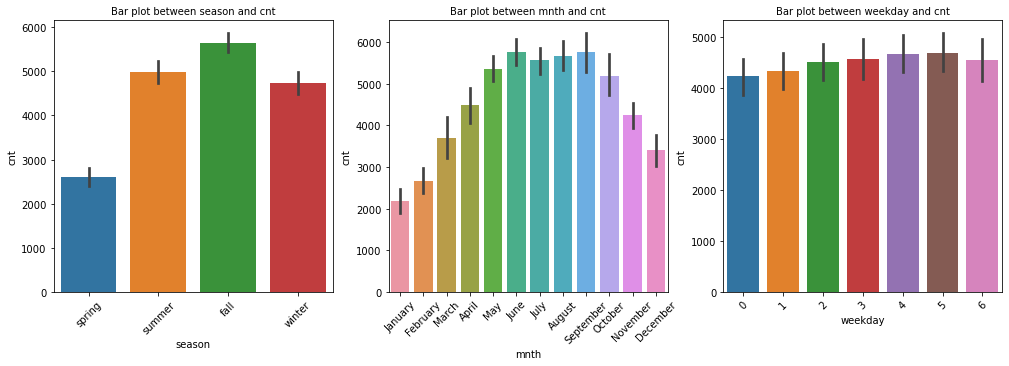

In [26]:
# We will analsye four variables at a time

x_axis = ["season", "mnth", "weekday"] # The reason we took three variables is that the information within these variables are self-explanatory

y_axis = "cnt"

for i,j in enumerate(x_axis):
    plt.subplot(1,3,i+1)
    plots(x = j, y = y_axis, bar_plot = True, rotation=45)
        
        
     

## Observations :
- It seems that the count is high in the fall, it makes sense as the temperatures gradually decreases making it suitable for riding bikes
- The summer breaks for student typically lasts for 2 and a a half months(from late may or late june) which may lead to an increase in outdoor activities 
- weekdays doesnt reveal any pattern

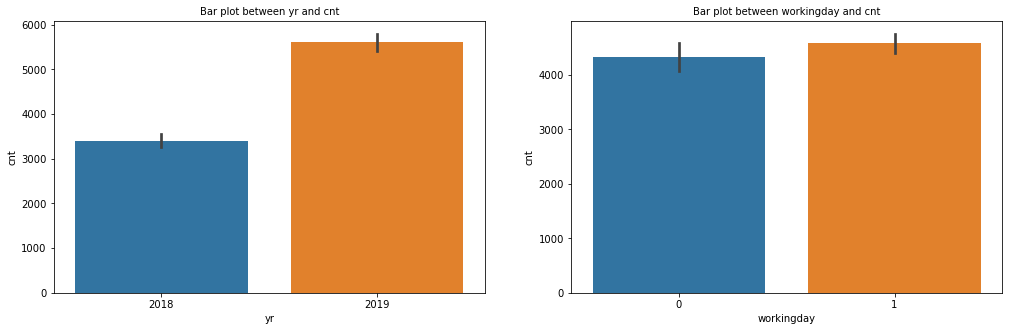

In [27]:
x = "yr"
y = "cnt"
plt.subplot(121)
plots(x = x, y = y, bar_plot = True)
plt.xticks(ticks = [0, 1], labels = ["2018", "2019"])
x = "workingday"
plt.subplot(122)
plots(x = x, y = y, bar_plot = True)

## Observations:
- The busniess has been growing in 2019 which is a good indicator for the company

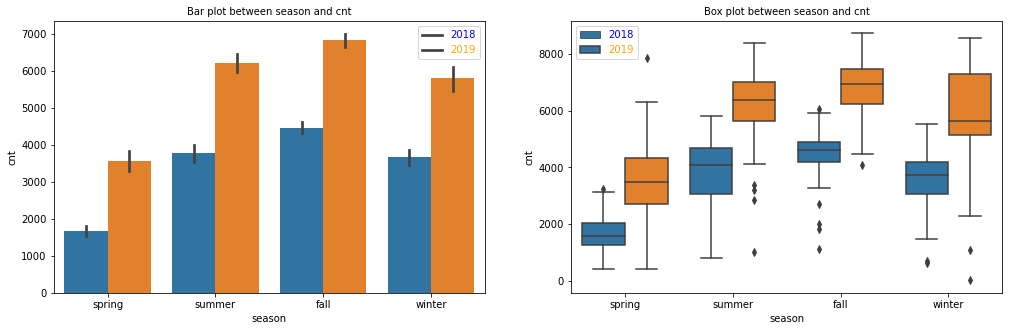

In [28]:
plt.subplot(121)
plots(x = "season", y = "cnt", hues = "yr", bar_plot = True)
plt.legend(labelcolor = ["blue", "orange"], labels = ["2018", "2019"])
plt.subplot(122)
plots(x = "season", y = "cnt", hues = "yr", box_plot = True)
plt.legend(labelcolor = ["blue", "orange"], labels = ["2018", "2019"])

## Observations:
- Across every season we see an increase in number in 2019

In [29]:
#

In [30]:
data.head()
data["weekday"] = data["weekday"].astype("category")
data.weekday


0      6
1      0
2      1
3      2
4      3
      ..
725    4
726    5
727    6
728    0
729    1
Name: weekday, Length: 730, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

## Creating Dummy variables for categorical variables and scaling features for numerical variables

### We will create dummies for season, mnth, weekday and weathersit

In [31]:
def create_dummies(column,prefix = None):
    return pd.get_dummies(data[column], prefix = prefix, drop_first = True)

In [32]:
dummies_for_season = create_dummies("season")
dummies_for_mnth = create_dummies("mnth")
dummies_for_weekday = create_dummies("weekday", prefix = "weekday")
dummies_for_weathersit = create_dummies("weathersit")

In [33]:
dummies_for_season 

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


### fall has been dropped

In [34]:
dummies_for_mnth

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


### April has been dropped

In [35]:
dummies_for_weathersit

,Ideal,Moderate
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
725,0,1
726,0,1
727,0,1
728,1,0


### Bad has been dropped

In [36]:
dummies_for_weekday

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,1,0
727,0,0,0,0,0,1
728,0,0,0,0,0,0


### weekday_0 has been dropped

In [37]:
# Now we will concatenate all the dummies and drop the orginal column from our datframe

data1 = pd.concat([data, dummies_for_season, dummies_for_mnth, dummies_for_weekday, dummies_for_weathersit], axis = 1)

In [38]:
data1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,October,September,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,Ideal,Moderate
0,spring,0,January,0,6,0,Moderate,14.11,18.18,80.58,...,0,0,0,0,0,0,0,1,0,1
1,spring,0,January,0,0,0,Moderate,14.90,17.69,69.61,...,0,0,0,0,0,0,0,0,0,1
2,spring,0,January,0,1,1,Ideal,8.05,9.47,43.73,...,0,0,1,0,0,0,0,0,1,0
3,spring,0,January,0,2,1,Ideal,8.20,10.61,59.04,...,0,0,0,1,0,0,0,0,1,0
4,spring,0,January,0,3,1,Ideal,9.31,11.46,43.70,...,0,0,0,0,1,0,0,0,1,0


In [39]:
data1.columns
    

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'Ideal', 'Moderate'],
      dtype='object')

In [40]:
# Let's drop the original columns
cols_to_drop = ["season", "mnth", "weekday", "weathersit"]

data1.drop(cols_to_drop, axis = 1, inplace = True)

In [41]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  August      730 non-null    uint8  
 12  December    730 non-null    uint8  
 13  February    730 non-null    uint8  
 14  January     730 non-null    uint8  
 15  July        730 non-null    uint8  
 16  June        730 non-null    uint8  
 17  March       730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  November    730 non-null    u

## Now we can split our data into training and test set 

In [42]:
train_df, test_df = train_test_split(data1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [43]:
print(train_df.shape)
print(test_df.shape)

(510, 30)
(219, 30)


## We will scale our numeric features using MinMaxScaler from scikit learn

In [44]:
scaler = MinMaxScaler()

In [45]:
data1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,Ideal,Moderate
0,0,0,0,14.11,18.18,80.58,10.75,985,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,14.90,17.69,69.61,16.65,801,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.05,9.47,43.73,16.64,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.20,10.61,59.04,10.74,1562,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,1,9.31,11.46,43.70,12.52,1600,1,0,...,0,0,0,0,1,0,0,0,1,0


In [46]:
# cols_to_scale = ["temp", "atemp", "hum", "windspeed", "cnt"]

cols_to_scale = ["temp", "atemp", "hum", "windspeed", "cnt"]

data1[cols_to_scale] = scaler.fit_transform(data1[cols_to_scale])



In [47]:
data1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,Ideal,Moderate
0,0,0,0,0.355211,0.373589,0.828586,0.284615,0.110792,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0.379216,0.360725,0.715784,0.466154,0.089623,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0.171073,0.144920,0.449666,0.465846,0.152669,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,0.175631,0.174849,0.607095,0.284308,0.177174,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,1,0.209359,0.197165,0.449357,0.339077,0.181546,1,0,...,0,0,0,0,1,0,0,0,1,0


In [48]:
# Let's confirm if these values are scaled proeprly or no

for i in cols_to_scale:
    print(f"Statistical features of {i} are : \n {data1[i].describe()} \n")

Statistical features of temp are : 
 count    730.000000
mean       0.543887
std        0.228102
min        0.000000
25%        0.346095
50%        0.548314
75%        0.743315
max        1.000000
Name: temp, dtype: float64 

Statistical features of atemp are : 
 count    730.000000
mean       0.519201
std        0.213973
min        0.000000
25%        0.339787
50%        0.536099
75%        0.695589
max        1.000000
Name: atemp, dtype: float64 

Statistical features of hum are : 
 count    730.000000
mean       0.645399
std        0.146402
min        0.000000
25%        0.534704
50%        0.643959
75%        0.750540
max        1.000000
Name: hum, dtype: float64 

Statistical features of windspeed are : 
 count    730.000000
mean       0.346575
std        0.159866
min        0.000000
25%        0.232000
50%        0.327077
75%        0.434692
max        1.000000
Name: windspeed, dtype: float64 

Statistical features of cnt are : 
 count    730.000000
mean       0.516108
std       

In [49]:
# It worked perfectly! All the features are scaled from 0 to 1, the benefit of this type of scaling is that it takes care of the outliers, since we had some in hum

## It's time to select features and build our model
### Since there are 30 features lets use our automated method of selecting features using RFE from sklearn

In [50]:
y_train = train_df.pop("cnt")
X_train = train_df

In [51]:
print(X_train.shape)
print(y_train.shape)

(510, 29)
(510,)


In [52]:
regressor = LinearRegression()
#regressor.fit(X_train, y_train)

In [53]:
rfe = RFE(regressor, n_features_to_select = 15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [54]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 6),
 ('workingday', False, 2),
 ('temp', False, 7),
 ('atemp', False, 14),
 ('hum', False, 13),
 ('windspeed', False, 9),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('August', True, 1),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', True, 1),
 ('March', False, 15),
 ('May', True, 1),
 ('November', True, 1),
 ('October', False, 10),
 ('September', True, 1),
 ('weekday_1', False, 3),
 ('weekday_2', False, 4),
 ('weekday_3', False, 11),
 ('weekday_4', False, 12),
 ('weekday_5', False, 8),
 ('weekday_6', True, 1),
 ('Ideal', True, 1),
 ('Moderate', True, 1)]

In [55]:
X_train.columns[rfe.support_] #Following are the columns selected by RFE using scikit learn

Index(['yr', 'spring', 'winter', 'August', 'December', 'February', 'January',
       'July', 'June', 'May', 'November', 'September', 'weekday_6', 'Ideal',
       'Moderate'],
      dtype='object')

In [56]:
# Now let's use our manual approach and eliminate features one by one using bottom up approach
# First let's define all the necessary function which will make our feauture selection more robust


def OLS_model(X_train_cols,y = y_train, return_model = False):
    
    X_train_with_constant = sm.add_constant(X_train[X_train_cols])
    lr = OLS(y_train, X_train_with_constant)
    lr_model = lr.fit()
    
    if return_model:
        return lr_model
    else:
        print(lr_model.summary())

        
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vifs = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]
    vif["VIFS"] = vifs
    return vif.sort_values(by = "VIFS", ascending = False)

### Let's first see how well the model performs on the features selected by our automated apporach using scikit learn lib

In [57]:
OLS_model(X_train_cols = X_train.columns[rfe.support_])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     131.3
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          2.02e-161
Time:                        16:35:45   Log-Likelihood:                -4177.5
No. Observations:                 510   AIC:                             8387.
Df Residuals:                     494   BIC:                             8455.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        888.9874    253.118      3.512      0.0

In [58]:
calc_vif(X = X_train[X_train.columns[rfe.support_]])


,Features,VIFS
13,Ideal,5.53
1,spring,4.65
14,Moderate,3.41
2,winter,3.30
6,January,2.15
0,yr,2.03
5,February,1.86
10,November,1.78
3,August,1.68
9,May,1.60


### Observations:
- Well we can see the model performed really well and the P- values are a bit high for two variables, we will check this out at the end of our manualc approach where we combine both the results
- The Vifs are also quite low and well below 5 so this very could be our final model but we will delve a bit deep and figure out if we can at all make this model a little bit more accurate
- We can use our RFE as a reference and build our model

In [59]:
X_train_temp = X_train
OLS_model(X_train_cols = X_train.columns)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.95
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          8.54e-181
Time:                        16:35:45   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     481   BIC:                             8376.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.0131    490.068      0.259      0.7

In [60]:
calc_vif(X_train_temp)

/Users/vernonmascarenhas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIFS
23,weekday_3,inf
2,workingday,inf
21,weekday_1,inf
25,weekday_5,inf
22,weekday_2,inf
1,holiday,inf
24,weekday_4,inf
3,temp,557.55
4,atemp,528.27
5,hum,33.83


## Observations:
- We have abusrdly high VIFs for temp, atemp smong several others
- We will first eliminate features having high p-value and analyse the model
- We will drop some week days as they tend to give inf/not defined values 

In [61]:
# We will define X_train_temp to store our changes 
X_train_temp = X_train.drop("atemp", axis = 1) 
OLS_model(X_train_cols = X_train_temp.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          8.87e-182
Time:                        16:35:45   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     482   BIC:                             8370.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.9134    488.741      0.282      0.7

In [62]:
calc_vif(X_train_temp)

/Users/vernonmascarenhas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIFS
23,weekday_4,inf
24,weekday_5,inf
2,workingday,inf
22,weekday_3,inf
21,weekday_2,inf
20,weekday_1,inf
1,holiday,inf
3,temp,51.97
4,hum,33.67
26,Ideal,19.36


## Observations :
- The VIFS score dropped drastically after eliminating "atemp"


In [63]:
X_train_temp = X_train_temp.drop("weekday_1", axis = 1) 
OLS_model(X_train_cols = X_train_temp.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          8.87e-182
Time:                        16:35:45   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     482   BIC:                             8370.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.9134    488.741      0.282      0.7

In [64]:
calc_vif(X_train_temp)

,Features,VIFS
3,temp,51.97
4,hum,33.67
25,Ideal,19.36
6,spring,12.95
8,winter,12.16
26,Moderate,10.73
2,workingday,9.59
7,summer,8.62
5,windspeed,7.29
18,October,6.66


In [65]:
X_train_temp = X_train_temp.drop("March", axis = 1) 
OLS_model(X_train_cols = X_train_temp.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.0
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          8.45e-183
Time:                        16:35:46   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     483   BIC:                             8364.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        143.8414    468.215      0.307      0.7

In [66]:
calc_vif(X_train_temp)

,Features,VIFS
3,temp,51.70
4,hum,31.57
24,Ideal,18.60
8,winter,11.37
25,Moderate,10.48
6,spring,10.41
2,workingday,9.52
7,summer,8.57
5,windspeed,7.26
9,August,5.98


In [67]:
X_train_temp = X_train_temp.drop("weekday_2", axis = 1) 
OLS_model(X_train_cols = X_train_temp.columns)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          7.95e-184
Time:                        16:35:46   Log-Likelihood:                -4097.9
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     484   BIC:                             8358.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        142.3588    467.607      0.304      0.7

In [68]:
calc_vif(X_train_temp)

,Features,VIFS
3,temp,51.60
4,hum,31.52
23,Ideal,18.60
8,winter,11.36
24,Moderate,10.48
6,spring,10.41
7,summer,8.57
5,windspeed,7.26
2,workingday,7.07
9,August,5.98


In [69]:
X_train_temp = X_train_temp.drop("June", axis = 1) 
OLS_model(X_train_cols = X_train_temp.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          7.33e-185
Time:                        16:35:46   Log-Likelihood:                -4097.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     485   BIC:                             8352.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        138.5240    466.384      0.297      0.7

In [70]:
calc_vif(X_train_temp)

,Features,VIFS
3,temp,34.15
4,hum,31.27
22,Ideal,18.59
8,winter,11.01
23,Moderate,10.47
6,spring,9.31
7,summer,7.99
5,windspeed,7.22
2,workingday,7.06
15,November,4.96


## Observations:
- There was yet another major drop in VIF score of temp


In [71]:
X_train_temp = X_train_temp.drop("October", axis = 1) 
OLS_model(X_train_cols = X_train_temp.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.9
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          6.77e-186
Time:                        16:35:46   Log-Likelihood:                -4097.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     486   BIC:                             8345.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.0502    460.732      0.341      0.7

In [72]:
calc_vif(X_train_temp)

,Features,VIFS
3,temp,34.12
4,hum,29.56
21,Ideal,18.47
22,Moderate,10.45
6,spring,9.25
7,summer,7.22
5,windspeed,7.09
2,workingday,7.06
8,winter,6.99
9,August,3.34


In [73]:
X_train_temp = X_train_temp.drop("August", axis = 1) 
OLS_model(X_train_cols = X_train_temp.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          7.16e-187
Time:                        16:35:46   Log-Likelihood:                -4098.1
No. Observations:                 510   AIC:                             8242.
Df Residuals:                     487   BIC:                             8340.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        219.5568    449.489      0.488      0.6

## Observations:
- There isnt much change in the VIFs as we witnessed before so we will calculate th VIFS after eliminating all the features having absurdly high p values

In [74]:
calc_vif(X_train_temp)

,Features,VIFS
3,temp,32.99
4,hum,28.42
20,Ideal,17.54
21,Moderate,10.01
2,workingday,7.04
5,windspeed,7.04
6,spring,6.58
8,winter,4.52
7,summer,3.99
11,January,2.51


In [75]:
X_train_temp = X_train_temp.drop("weekday_4", axis = 1) 
OLS_model(X_train_cols = X_train_temp.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     134.8
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          8.44e-188
Time:                        16:35:46   Log-Likelihood:                -4098.5
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     488   BIC:                             8334.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        236.6431    448.840      0.527      0.5

In [76]:
X_train_temp = X_train_temp.drop("weekday_3", axis = 1) 
OLS_model(X_train_cols = X_train_temp.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.5
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          1.08e-188
Time:                        16:35:46   Log-Likelihood:                -4098.9
No. Observations:                 510   AIC:                             8240.
Df Residuals:                     489   BIC:                             8329.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        242.3233    448.742      0.540      0.5

In [77]:
X_train_temp = X_train_temp.drop("weekday_5", axis = 1) 
OLS_model(X_train_cols = X_train_temp.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          1.62e-189
Time:                        16:35:46   Log-Likelihood:                -4099.6
No. Observations:                 510   AIC:                             8239.
Df Residuals:                     490   BIC:                             8324.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        247.9830    448.821      0.553      0.5

In [78]:
X_train_temp = X_train_temp.drop("May", axis = 1) 
OLS_model(X_train_cols = X_train_temp.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          3.60e-190
Time:                        16:35:46   Log-Likelihood:                -4100.6
No. Observations:                 510   AIC:                             8239.
Df Residuals:                     491   BIC:                             8320.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.1993    441.758      0.292      0.7

In [79]:
X_train_temp = X_train_temp.drop("February", axis = 1) 
OLS_model(X_train_cols = X_train_temp.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          9.69e-191
Time:                        16:35:46   Log-Likelihood:                -4102.0
No. Observations:                 510   AIC:                             8240.
Df Residuals:                     492   BIC:                             8316.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.4529    438.061      0.070      0.9

## Observations:
- All the features are now well within the range of 0.05
- We will calculate the VIFs now for these features and analyse it even further cause we have that "hum" which is high collinear


In [80]:
calc_vif(X_train_temp)

,Features,VIFS
3,temp,30.91
4,hum,27.81
15,Ideal,16.87
16,Moderate,9.69
5,windspeed,6.89
6,spring,5.73
2,workingday,5.48
8,winter,4.51
7,summer,3.29
0,yr,2.10


In [81]:
X_train_temp = X_train_temp.drop("hum", axis = 1) 
OLS_model(X_train_cols = X_train_temp.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.5
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          1.51e-188
Time:                        16:35:46   Log-Likelihood:                -4109.9
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     493   BIC:                             8326.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -939.7476    367.991     -2.554      0.0

In [82]:
calc_vif(X_train_temp)

,Features,VIFS
3,temp,17.61
14,Ideal,16.76
15,Moderate,9.41
4,windspeed,6.88
2,workingday,5.43
5,spring,4.52
7,winter,3.41
6,summer,2.83
0,yr,2.08
13,weekday_6,2.02


### We will just stop here and compare this model with our rfe model and make some changes, cause the p values are pretty low for every variable and removing any one of them causes a decrease in accuracy

In [87]:
X_train_rfe_columns = X_train.columns[rfe.support_]
X_train_rfe_columns

Index(['yr', 'spring', 'winter', 'August', 'December', 'February', 'January',
       'July', 'June', 'May', 'November', 'September', 'weekday_6', 'Ideal',
       'Moderate'],
      dtype='object')

In [88]:
X_train_temp.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'December', 'January', 'July', 'November', 'September',
       'weekday_6', 'Ideal', 'Moderate'],
      dtype='object')

### As we can see our manual approach is much identical to the one rfe came up with initially, now lets combine our features so that we can have the most optimum model to work with

In [107]:
# We will also utilise one more feature of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 6),
 ('workingday', False, 2),
 ('temp', False, 7),
 ('atemp', False, 14),
 ('hum', False, 13),
 ('windspeed', False, 9),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('August', True, 1),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', True, 1),
 ('March', False, 15),
 ('May', True, 1),
 ('November', True, 1),
 ('October', False, 10),
 ('September', True, 1),
 ('weekday_1', False, 3),
 ('weekday_2', False, 4),
 ('weekday_3', False, 11),
 ('weekday_4', False, 12),
 ('weekday_5', False, 8),
 ('weekday_6', True, 1),
 ('Ideal', True, 1),
 ('Moderate', True, 1)]

In [ ]:
## All this information about the features will help us select some which will be the best suited for our model

In [181]:
#Removing windspeed and adding "February"
# Replacing February with June
# Adding October
cols = ['yr',  'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'December', 'January', 'July', 'November', 'September',
       'weekday_6', 'Ideal']

In [182]:
OLS_model(X_train_cols = cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     162.4
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          9.53e-175
Time:                        17:32:49   Log-Likelihood:                -4148.3
No. Observations:                 510   AIC:                             8327.
Df Residuals:                     495   BIC:                             8390.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        739.8537    333.876      2.216      0.0

In [184]:
calc_vif(X_train[cols])

,Features,VIFS
2,temp,9.10
3,windspeed,6.80
1,workingday,4.74
4,spring,3.35
6,winter,3.03
13,Ideal,2.76
5,summer,2.40
0,yr,2.07
12,weekday_6,1.86
10,November,1.78


In [185]:
lr_model = OLS_model(X_train_cols = cols, return_model = True)

In [190]:
lr_model.predict(sm.add_constant)

ValueError: shapes (510,14) and (15,) not aligned: 14 (dim 1) != 15 (dim 0)

In [187]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,October,September,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,Ideal,Moderate
653,1,0,1,19.20,23.04,55.83,12.21,0,0,1,...,1,0,0,1,0,0,0,0,1,0
576,1,0,1,29.25,33.14,70.42,11.08,0,0,0,...,0,0,0,1,0,0,0,0,1,0
426,1,0,0,16.98,20.67,62.12,10.79,1,0,0,...,0,0,0,0,0,0,0,1,0,1
728,1,0,0,10.49,11.58,48.33,23.50,1,0,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,15.44,18.88,48.96,8.71,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.55,32.99,58.79,13.92,0,1,0,...,0,0,1,0,0,0,0,0,0,1
578,1,0,1,30.85,35.35,65.96,8.67,0,0,0,...,0,0,0,0,0,1,0,0,1,0
53,0,0,1,9.09,12.29,42.30,6.31,1,0,0,...,0,0,0,0,1,0,0,0,1,0
350,0,0,0,10.59,12.47,56.08,16.29,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [188]:
y_train

653    7534
576    7216
426    4066
728    1796
482    4220
       ... 
526    6664
578    7261
53     1917
350    2739
79     2077
Name: cnt, Length: 510, dtype: int64